# Data Analysis Notebook - How to bring in data from a Gen3 Data Commons to the workspace and perform data analysis

## 1. Introduction to the Open Access Data Commons
- The Open Access Data Commons https://gen3.datacommons.io/ supports the management, analysis and sharing of data for the research community with the aim of accelerating discovery and development of diagnostics, treatment and prevention of diseases.


- Gen3 Data Commons store a) data files **and** b) structured metadata.


- For the first part of this notebook (sections 2 and 3), we show how to download data files and bring them to the workspace using the Gen3-client and in the second part below (section 4), we will show how to download structured metadata to the workspace using the Gen3 Python SDK.

## 2. Download data files from the Gen3 Data Commons and bring them to the workspace
### 2.1 Introduction to the dataset
- We will analyze two data files ('GSE63878_final_list_of_normalized_data.txt.gz' and 'pheno_63878_2.txt') from the study "GEO-GSE63878". 
- This study deals with peripheral blood leukocytes gene expressions which were subject to transcriptional analysis for 48 service members both prior-to and following deployment to conflict zones. Half of the subjects returned with Post-traumatic Stress Disorder (PTSD), while the other half did not.

### 2.2 Importing the data files to the workspace using the Gen3-client: a step-by-step guide

- First, we can find and browse all data files stored on the Gen3 Data Commons under the "Files" tab on the [Data Exploration page](https://gen3.datacommons.io/exploration). 


- To download data files, we will create and download a file manifest, which is a light JSON file that is called by the Gen3-client to download all enlisted entities to the workspace:

- In the Explorer under the "Files" tab we find the "Data Format" category; from here we can select the box next to "TXT" that builds a cohort and shows all files in the Data Commons that end on "TXT". In this case: 'GSE63878_final_list_of_normalized_data.txt.gz' and 'pheno_63878_2.txt'. 


- We click on "Download (File) Manifest", save it to our local drive, and upload it to the workspace under the /pd directory as "file-manifest.json". For help on this step, see the screen recordings shown [here](https://gen3.org/resources/user/analyze-data/#1-launch-workspace). 


- **Only the files in the /pd directory will persist in the cloud after workspace termination.** 
<img src="https://raw.githubusercontent.com/uc-cdis/gen3.org/master/content/figs/commons/generic/notebook_drive.png" width="200px">


- We visit now the [profile page](https://gen3.datacommons.io/identity), click on "Create API key", download the .JSON file and upload this "credentials.json" to the workspace under the /pd directory. 


- In the workspace, we open a new terminal.
<img src="https://raw.githubusercontent.com/uc-cdis/gen3.org/master/content/figs/commons/generic/notebook_terminal.png" width="200px">


- We run the following commands in the terminal (also shown [here](https://gen3.org/resources/user/analyze-data/#2-getting-files-into-the-gen3-workspace)) to download and install the Gen3-client, configure the profile "demo" with the "credentials.json", and to download the data files calling the "file-manifest.json":


```
- wget https://github.com/uc-cdis/cdis-data-client/releases/download/2020.11/dataclient_linux.zip
- unzip dataclient_linux.zip
- PATH=$PATH:~/ 

- gen3-client configure --apiendpoint=https://gen3.datacommons.io --profile=demo --cred=~/pd/credentials.json
- cd pd
- gen3-client download-multiple --profile=demo --manifest=file-manifest.json --skip-completed
``` 

- The two files should be now saved in the /pd directory. You can terminate the terminal session.

> **Note**. If you want to download only a single data file the Gen3-client command changes as shown [here](https://gen3.org/resources/user/gen3-client/#4-download-a-single-data-file-using-a-guid). You can also find the data file on the Exploration Page and click on the file's GUID to "Download".  



## 3. Load and analyze the data files here in the workspace
- For this section, you need to start running a jupyter python notebook and run the code snippets below.

### 3.1 Install dependencies and import python libraries

In [1]:
# Uncomment the lines to install libraries if needed.
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import os
import seaborn as sns                 
import re
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import gzip
import scipy
import sys
import sklearn
import random
import math

### 3.2 Unzip data file

In [ ]:
!gzip -dk 'GSE63878_final_list_of_normalized_data.txt.gz' # command -k saves the original zipped file

### 3.3 Load the first txt file as a Pandas dataframe "pheno_df"
This dataframe shows the characteristics, sample descriptions, etc. associated with measured gene expression.

In [2]:
pheno_df = pd.read_csv('/home/jovyan/pd/pheno_63878_2.txt', sep='\t')
pheno_df.head() # show top 5 rows of dataframe

,Source Name,Comment [Sample_description],Comment [Sample_source_name],Comment [Sample_title],Characteristics [cell type],Characteristics [condition],Term Source REF,Term Accession Number,Characteristics [individual],Characteristics [organism],...,Normalization Name,Derived Array Data File,Comment [Derived ArrayExpress FTP file],FactorValue [condition],Term Source REF.9,Term Accession Number.2,FactorValue [individual],FactorValue [time-point],Time,PTSD
0,GSM1558870 1,Sample48_3,"Human peripheral blood leukocytes, control, po...",Control Post 48,peripheral blood leukocytes,control,EFO,EFO_0001461,48,Homo sapiens,...,GSM1558870_sample_table.txt norm,GSM1558870_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,control,EFO,EFO_0001461,48,post-deployment,2,1
1,GSM1558869 1,Sample48_1,"Human peripheral blood leukocytes, control, pr...",Control Pre 48,peripheral blood leukocytes,control,EFO,EFO_0001461,48,Homo sapiens,...,GSM1558869_sample_table.txt norm,GSM1558869_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,control,EFO,EFO_0001461,48,pre-deployment,1,1
2,GSM1558868 1,Sample47_3,"Human peripheral blood leukocytes, control, po...",Control Post 47,peripheral blood leukocytes,control,EFO,EFO_0001461,47,Homo sapiens,...,GSM1558868_sample_table.txt norm,GSM1558868_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,control,EFO,EFO_0001461,47,post-deployment,2,1
3,GSM1558867 1,Sample47_1,"Human peripheral blood leukocytes, control, pr...",Control Pre 47,peripheral blood leukocytes,control,EFO,EFO_0001461,47,Homo sapiens,...,GSM1558867_sample_table.txt norm,GSM1558867_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,control,EFO,EFO_0001461,47,pre-deployment,1,1
4,GSM1558866 1,Sample46_3,"Human peripheral blood leukocytes, control, po...",Control Post 46,peripheral blood leukocytes,control,EFO,EFO_0001461,46,Homo sapiens,...,GSM1558866_sample_table.txt norm,GSM1558866_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,control,EFO,EFO_0001461,46,post-deployment,2,1


### 3.4 Load the second txt file as a Pandas dataframe "rna_df"
This dataframe shows genome expressions. Numbers after "Sample_" indicate pre-deployment ("1") and post-deployment ("3"). 

In [3]:
os.chdir('/home/jovyan/pd')
rna_df = pd.read_csv('/home/jovyan/pd/GSE63878_final_list_of_normalized_data.txt', sep='\t')
rna_df.head() 

,Probe ID,Gene Symbol,Sample1_1,Sample1_3,Sample2_1,Sample2_3,Sample3_1,Sample3_3,Sample4_1,Sample4_3,...,Sample46_3,Sample47_1,Sample47_3,Sample48_1,Sample48_3,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,8066716,ELMO2,9.137931,7.879140,8.706623,8.413021,8.871833,7.684935,9.283664,8.278483,...,8.542750,8.799327,8.998155,8.677686,8.756859,NaN,NaN,NaN,NaN,NaN
1,8030368,RPS11,11.924280,11.573510,11.799527,11.755598,12.007807,11.758845,11.930047,11.928939,...,12.123981,11.995779,12.017707,12.050722,12.107991,NaN,NaN,NaN,NaN,NaN
2,7980044,PNMA1,7.015597,6.370872,6.821562,6.638079,6.968514,6.326143,6.848688,6.813374,...,6.868656,6.924999,6.867908,6.782773,7.067915,NaN,NaN,NaN,NaN,NaN
3,7940479,TMEM216,7.503816,5.972232,7.194987,6.272724,7.196858,6.401971,7.143758,6.802013,...,6.614511,6.913884,7.471228,6.982341,7.057705,NaN,NaN,NaN,NaN,NaN
4,8066279,ZHX3,6.344508,6.955141,6.720097,6.787643,6.648538,6.777332,6.500822,6.544580,...,6.824411,6.714426,6.355158,6.598794,6.505404,NaN,NaN,NaN,NaN,NaN


### 3.5 Prepare the second dataframe rna_df (e.g. data cleaning)

In [4]:
rna_df = rna_df.dropna(1) # remove columns that contain "NaN"
del rna_df['Probe ID'] # delete first column for further analysis.
all_genes = set(rna_df["Gene Symbol"].to_list()) # save this column as list for further analysis.

### 3.6 Organize pheno_df and rna_df data into categories and combine

In [5]:
# list(pheno_df.columns) 
trim_pheno_df = pheno_df[['Comment [Sample_description]', 'Characteristics [condition]', 'FactorValue [time-point]']] # select columns to be worked with
trim_pheno_df.head()

,Comment [Sample_description],Characteristics [condition],FactorValue [time-point]
0,Sample48_3,control,post-deployment
1,Sample48_1,control,pre-deployment
2,Sample47_3,control,post-deployment
3,Sample47_1,control,pre-deployment
4,Sample46_3,control,post-deployment


In [6]:
# Add the categories to the dataset 
blank = [name for name in rna_df.columns] # list all headers in rna_df

# Category "condition"
condition = (trim_pheno_df['Characteristics [condition]']).tolist() # move all rows of this column into a list
condition = condition[::-1] # switch as column Characteristics [condition] begins with sample48_3 instead of Sample1_1
condition.insert(0, 'condition') # add header 
ptsd = {col:val for col, val in zip(blank, condition)} # match headers from rna_df to 'condition'

# Category "deployment"
deployment = (trim_pheno_df['FactorValue [time-point]']).tolist()
deployment = deployment[::-1]
deployment.insert(0, 'deployment')
deploy = {col:val for col, val in zip(blank, deployment)}


Attention: <span style="color:red">**The next two code snippets should be run only once.</span>**

In [7]:
# Adding category lists to the rna_df dataframe
# This will combine both datasets
rna_df = rna_df.append(ptsd, ignore_index=True)  # run only once
rna_df = rna_df.append(deploy, ignore_index=True) # run only once
rna_df.tail() # shows the last 5 rows of the dataframe

,Gene Symbol,Sample1_1,Sample1_3,Sample2_1,Sample2_3,Sample3_1,Sample3_3,Sample4_1,Sample4_3,Sample5_1,...,Sample44_1,Sample44_3,Sample45_1,Sample45_3,Sample46_1,Sample46_3,Sample47_1,Sample47_3,Sample48_1,Sample48_3
10181,SLC39A6,8.24209,7.17973,7.79949,7.60747,7.92649,7.31457,7.8781,7.71006,8.41737,...,8.26862,7.45759,7.47875,8.39298,7.92523,7.82593,8.13023,8.41975,8.00268,7.96456
10182,SNRPD2,8.1895,7.62186,7.92915,7.70063,8.2255,7.59012,7.76954,7.70023,8.05942,...,8.43709,7.79318,7.95529,7.9854,7.95592,8.17159,7.93,7.92019,8.01057,8.13519
10183,CTSC,10.444,9.77531,10.2586,9.72933,10.3202,9.74488,10.7405,10.1667,10.4375,...,10.4621,9.83597,10.0497,10.5271,10.1621,10.1144,10.5917,10.7041,10.3741,10.3844
10184,condition,case (PTSD risk),case (PTSD),case (PTSD risk),case (PTSD),case (PTSD risk),case (PTSD),case (PTSD risk),case (PTSD),case (PTSD risk),...,control,control,control,control,control,control,control,control,control,control
10185,deployment,pre-deployment,post-deployment,pre-deployment,post-deployment,pre-deployment,post-deployment,pre-deployment,post-deployment,pre-deployment,...,pre-deployment,post-deployment,pre-deployment,post-deployment,pre-deployment,post-deployment,pre-deployment,post-deployment,pre-deployment,post-deployment


In [8]:
# Transpose and relabel for easy wrangling
trans = rna_df.transpose() 
trans.columns = trans.iloc[0] # [0] is the gene symbol row
trans = trans.drop(trans.index[0]) # only run once, or you'll start losing genes 
trans.head()

Gene Symbol,ELMO2,RPS11,PNMA1,TMEM216,ZHX3,ERCC5,PDCL3,DECR1,CADM4,RPS18,...,SELO,GOLGA8B,RAB8A,PCIF1,PIK3IP1,SLC39A6,SNRPD2,CTSC,condition,deployment
Sample1_1,9.13793,11.9243,7.0156,7.50382,6.34451,8.50401,6.51273,9.07524,7.17572,10.4082,...,8.59976,7.81222,9.43908,9.0422,8.63562,8.24209,8.1895,10.444,case (PTSD risk),pre-deployment
Sample1_3,7.87914,11.5735,6.37087,5.97223,6.95514,7.90332,5.62645,8.55404,6.94569,10.2794,...,7.92597,7.71653,8.00783,8.11592,8.13457,7.17973,7.62186,9.77531,case (PTSD),post-deployment
Sample2_1,8.70662,11.7995,6.82156,7.19499,6.7201,8.42773,6.30857,9.02177,7.07879,10.5628,...,8.29128,8.00509,9.53683,8.6407,8.58806,7.79949,7.92915,10.2586,case (PTSD risk),pre-deployment
Sample2_3,8.41302,11.7556,6.63808,6.27272,6.78764,8.28691,5.56848,8.66914,7.00094,10.6323,...,8.2166,8.31954,8.41639,8.21003,8.3962,7.60747,7.70063,9.72933,case (PTSD),post-deployment
Sample3_1,8.87183,12.0078,6.96851,7.19686,6.64854,8.67884,6.50687,8.82516,6.95107,10.7497,...,8.58784,8.05394,9.08206,8.85754,8.89265,7.92649,8.2255,10.3202,case (PTSD risk),pre-deployment


### 3.7 Statistical analysis on data 
- First we define the analysis functions and then we plot the data.

#### 3.7.1 Processing dataframe

In [9]:
# Import libraries
import scipy
import sys
import sklearn
import random
import math

# Define function
def process_data(expression_df, condition, control, experimental):
    #expresion_df = input is the dataframe that we have defined above, gene expressions before and after deployment
    #condition = choose condition; for example separate your dataframe between between condition and deployment; input as string
    #control = control variable; input as string
    #experimental = experimental variable, input as string
    #returns dataframe of gene names, mean values, log2fold change, p-value, -log10(pval), and all replicates for each gene
    
    experimental_df = expression_df[expression_df[condition].str.contains(experimental)]
    experimental_df = expression_df.drop(columns=['condition', 'deployment']) 
    control_df = expression_df[expression_df[condition].str.contains(control)]
    control_df = control_df.drop(columns=['condition', 'deployment'])
    
    deg_genes = {} # dictionary of final data
    gene_names = list(experimental_df.columns) 
    for gene in gene_names:
        ex_mean = experimental_df[gene].mean() # experimental mean
        ctrl_mean = control_df[gene].mean() # control mean
        ex_reps = experimental_df[gene] # all replicates of PTSD samples
        control_reps = control_df[gene] # all replicates of control samples
        pval = scipy.stats.ttest_ind(control_reps, ex_reps) # calculate pval
        pvalue = pval.pvalue # gets specific p-value, removes meta data
        gene_data = {
            'GeneNames': gene,
            'ctrl_mean': ctrl_mean,
            'ex_mean': ex_mean,
            'log2(foldchange)': math.log2(ex_mean) - math.log2(ctrl_mean),
            'p-value': pvalue, #gets only the p-val
            '-log10(p-value)': math.log10(pvalue) * (-1), 
            'ctrl_reps': control_reps.values.tolist(),
            'experimental_reps': ex_reps.values.tolist() 
        }

        deg_genes[gene] = gene_data
        
    deg_data_frame = pd.DataFrame.from_dict(deg_genes, orient='index')
    
    return(deg_data_frame)

In [10]:
# Returns dataframe of gene names, means, log2fold change, p-value, -log10(pval), and all replicates for each gene
deg_data_frame = process_data(trans, 'condition', 'control', 'PTSD')
deg_data_frame.reset_index(drop=True)

,GeneNames,ctrl_mean,ex_mean,log2(foldchange),p-value,-log10(p-value),ctrl_reps,experimental_reps
0,1-Mar,9.510892,9.532068,0.003208,0.687208,0.162912,"[9.410044466, 9.107843367000001, 9.366556499, ...","[9.609778596, 9.105890847000001, 9.562257875, ..."
1,1-Sep,9.076845,9.053272,-0.003752,0.676129,0.169970,"[9.032684824, 8.335088326000001, 9.058631866, ...","[9.16795825, 7.8387380229999994, 9.01605535299..."
2,10-Sep,5.999581,5.977097,-0.005417,0.645976,0.189784,"[5.868845003, 6.151832213, 5.237751485, 5.6133...","[5.893990292000001, 5.981416566, 5.474670931, ..."
3,11-Sep,8.466428,8.468044,0.000275,0.973021,0.011878,"[8.480006652, 7.933843997, 8.143054023, 7.9811...","[8.509015495, 7.844778159, 8.445299485, 8.3667..."
4,14-Sep,9.287598,9.281226,-0.000990,0.912520,0.039758,"[9.137119174, 8.947042253, 9.440136676, 9.0133...","[9.067632567999999, 9.070145062, 8.910505062, ..."
5,15-Sep,10.469146,10.464646,-0.000620,0.874873,0.058055,"[10.28441173, 10.17050459, 10.17577238, 10.345...","[10.33314355, 10.12164928, 10.33216856, 10.225..."
6,2-Mar,8.610877,8.610415,-0.000077,0.994711,0.002303,"[8.698068812999999, 7.894693602, 7.98176665, 8...","[8.910645377, 8.031103538, 8.216321252, 8.0965..."
7,2-Sep,9.527714,9.506905,-0.003154,0.680029,0.167473,"[9.52285479, 8.917381702, 9.111436143999999, 8...","[9.661669016, 8.838995168, 9.336902379, 9.1733..."
8,3-Mar,7.889784,7.892823,0.000556,0.954027,0.020439,"[7.987255996, 7.407566161, 7.820764324, 7.5369...","[7.829274094, 7.129441302, 7.474798702999999, ..."
9,5-Mar,7.849298,7.874746,0.004670,0.532610,0.273591,"[8.017721647, 7.531838991, 7.684344511, 7.5517...","[8.198870231, 7.3032367979999995, 7.806763694,..."


#### 3.7.2 Plot top gene expressions

In [11]:
# Define function
def top_expressed_gene(deg_data_frame, control, experimental, top_number):
    # requires deg_data_frame from process data, string of control and experimental mean names, and top number of genes
    # returns plot of top expressed genes in the experimental group, plotted against the expression of the control group
    control_mean = deg_data_frame[control]
    experimental_mean = deg_data_frame[experimental]
    
    sorted_mean = experimental_mean.sort_values(ascending= False) # sorting by greatest expression
    top_genes = sorted_mean[:top_number].keys().tolist() # getting the top expressed genes

    
    control_vals = deg_data_frame['ctrl_reps'][top_genes]
    experimental_vals = deg_data_frame['experimental_reps'][top_genes]
    
    expression_data =  pd.DataFrame([control_vals, experimental_vals])
    
    print('The top ' +str(top_number)+ ' expressed genes are:' ) 
    
    
    for gene in top_genes:
        sns.set(style='whitegrid') 
        plot_data = expression_data[gene].apply(pd.Series)
        new_plot_data=plot_data.T
        new_plot_data.columns =['Control', 'Experiment'] 
        sns.violinplot(data=new_plot_data, palette="Set1").set(title=str(gene))
        ax = sns.swarmplot(data=new_plot_data, color="0", alpha=.35)
        ax.set(ylabel='Expression')
        plt.show() 

The top 2 expressed genes are:


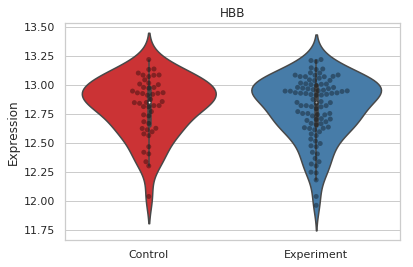

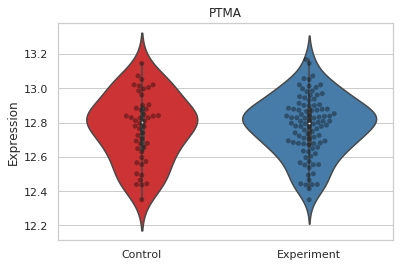

In [12]:
# Returns plot of top expressed genes in the experimental group, plotted against the expression of the control group
top = top_expressed_gene(deg_data_frame, 'ctrl_mean', 'ex_mean', 2)


#### 3.7.3 Plot favorite gene expression

In [13]:
# Define function
def your_fav_gene(deg_data_frame, control, experimental, fav_gene):
    # requires deg_data_frame from process data, string of control and experimental names, and name of gene you'd like to plot
    # returns plot of expression in control and experimental group

    control_mean = deg_data_frame[control][fav_gene]
    experimental_mean = deg_data_frame[experimental][fav_gene]

    control_vals = deg_data_frame['ctrl_reps'][fav_gene]
    experimental_vals = deg_data_frame['experimental_reps'][fav_gene] 

    expression_data =  pd.DataFrame([control_vals, experimental_vals])
    #print('Favorite expressed gene: ' +str(fav_gene))
    #print(expression_data)

    
    sns.set(style='whitegrid')
    plot_data = expression_data.transpose() 
    plot_data.rename(columns = {0:'Control',1:'Experiment'}, inplace=True)    
    ax = sns.violinplot(data=plot_data, palette="husl").set(title='Your favorite gene is '+str(fav_gene))
    ax = sns.swarmplot(data=plot_data, color="1", alpha=.4)

    ax.set(ylabel='Expression')
    plt.show()      

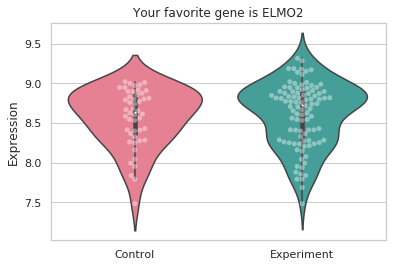

In [14]:
# Returns plot of expression in control and experimental group of the gene of our choice
ELMO2 = your_fav_gene(deg_data_frame, 'ctrl_mean', 'ex_mean', 'ELMO2') # change to any gene in 'ELMO2'

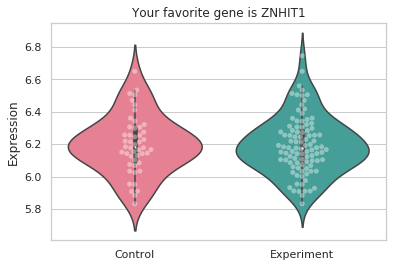

In [15]:
# Returns plot of expression in control and experimental group of the gene of our choice
ZNHIT1 = your_fav_gene(deg_data_frame, 'ctrl_mean', 'ex_mean', 'ZNHIT1') # change to any gene in 'ZNHIT1'

#### 3.7.4 Plot data in volcano plot and MA plot

In [16]:
# Define functions
def volcano_plot(deg_data_frame):
    # input deg_data_frame from process_data
    # returns volcano plot
    fig, ax = plt.subplots()
    volcano_plot = deg_data_frame.plot(x='log2(foldchange)', y='-log10(p-value)', c='p-value', kind='scatter', colormap='viridis', title = 'volcano plot', ax=ax)
                    
def MA_plot(deg_data_frame):
    # input deg_data_frame from process_data
    # returns MA plot
    fig, ax = plt.subplots()
    MA_plot = deg_data_frame.plot(x='ctrl_mean', y='log2(foldchange)', c='p-value', kind='scatter', colormap='viridis', title='MA plot', ax=ax)

    
def save_deg_data(deg_data_frame, file_name, path):
    # requires dataframe in the format generated from 'process_data'
    # saves the file with the given name in the given location
    final_path = os.path.join(path, f"{file_name}.csv")
    deg_data_frame.to_csv(final_path)

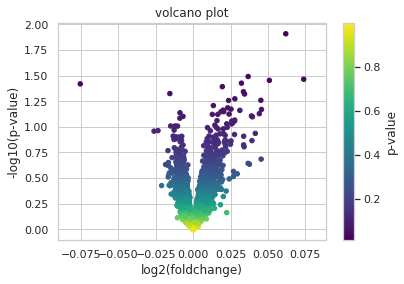

In [17]:
# Volcano plot identifies changes in large data sets composed of replicate data.
volcano_plot(deg_data_frame)

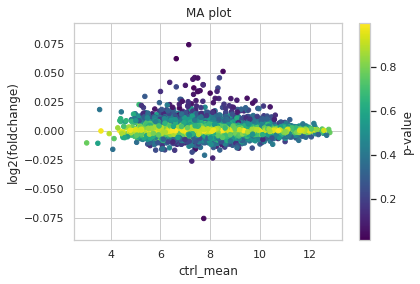

In [18]:
# MA plot visualizes the differences between measurements taken in two samples, by transforming the data onto M (log ratio) and A (mean average) scales, then plotting these values. 
MA_plot(deg_data_frame)

**End of demo notebook on gene expresssion.**

## 4. Analysis on structured metadata from the OpenAccess-CCLE project

### 4.1 Introduction to the dataset
- The project's data can be found here on the [data model graph](https://gen3.datacommons.io/OpenAccess-CCLE).
- The metadata we are interested in is in the node **"lab_test"**.
- Metadata in the node **"lab_test"** include parameters associated with the result of a standardized, clinical laboratory test aimed at quantifying a particular molecule, analyte or biological marker in a biospecimen collected from a study subject.

### 4.2 Import data to the workspace using the Gen3 Python SDK: a step-by-step guide
- The Gen3 PSDK is a Python librabry containing classes and functions for sending common requests to the Gen APIs. 
- The SDK is open source and the full documentation about the SDK can be found [here](https://github.com/uc-cdis/gen3sdk-python).

In [19]:
# Import Gen3 SDK tools to the workspace
!pip install gen3
import gen3
from gen3.auth import Gen3Auth
from gen3.submission import Gen3Submission

     |████████████████████████████████| 71kB 8.8MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1MB 27.3MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 42.5MB/s ta 0:00:01
     |████████████████████████████████| 71kB 37.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 29.2MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 184kB 24.6MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 21.3MB/s eta 0:00:01
     |██████████████████████████

In [ ]:
# Useful commands to print and change current working directory
#os.getcwd() # print directory
#os.chdir('/home/jovyan') # change directory

In [20]:
# Authentication by calling the earlier downloaded credentials
endpoint = "https://gen3.datacommons.io/"
creds = "/home/jovyan/pd/gen_creds.json"
auth = Gen3Auth(endpoint, creds)
sub = Gen3Submission(endpoint, auth)
home_directory = '/home/jovyan/pd/dir_x' # the "dir_x" was created for demo purposes. Replace with a path if needed.

In [21]:
# Download the data associated to graph node using function "export_node"
lab_test = sub.export_node("OpenAccess", "CCLE", "lab_test", "tsv", home_directory +"/OA_CCLE_lab_test.tsv")


Output written to file: /home/jovyan/pd/dir_x/OA_CCLE_lab_test.tsv


### 4.2 Read and clean (meta)dataset

In [22]:
lab_test_df = pd.read_csv('/home/jovyan/pd/dir_x/OA_CCLE_lab_test.tsv', sep ="\t")
lab_test_df.dropna(1) # remove columns that have "NaN"

,type,id,project_id,submitter_id,test_type,analyte,sample_composition,sample_composition_other,samples.id,samples.submitter_id
0,lab_test,000041a3-5689-401a-8763-82060ef2915f,OpenAccess-CCLE,GI1_CENTRAL_NERVOUS_SYSTEM_L-685458_response_4,Drug Response,L-685458,CENTRAL_NERVOUS_SYSTEM,GI1,27931fe2-f8de-4fd7-9d05-5e53f164ae7b,GI1_CENTRAL_NERVOUS_SYSTEM
1,lab_test,00009965-b61f-4a85-b075-0d11d0fb1783,OpenAccess-CCLE,SW620_LARGE_INTESTINE_17-AAG_response_3,Drug Response,17-AAG,LARGE_INTESTINE,SW620,665a766a-9159-466e-a43a-d9738f2192c8,SW620_LARGE_INTESTINE
2,lab_test,0000c543-c542-4d84-8044-f773d83f51ea,OpenAccess-CCLE,SH10TC_STOMACH_PD-0325901_response_8,Drug Response,PD-0325901,STOMACH,SH10TC,7feb3c36-ff13-4fe5-a8b4-1f0e38687353,SH10TC_STOMACH
3,lab_test,00029ae5-5b91-4550-ab37-e18cd0038d98,OpenAccess-CCLE,KPNSI9S_AUTONOMIC_GANGLIA_TAE684_response_8,Drug Response,TAE684,AUTONOMIC_GANGLIA,KPNSI9S,5fac9293-90ae-488c-905a-acafbc1b9bf3,KPNSI9S_AUTONOMIC_GANGLIA
4,lab_test,000343cb-ce29-42cf-8a7e-952403901eb1,OpenAccess-CCLE,MKN7_STOMACH_AEW541_response_3,Drug Response,AEW541,STOMACH,MKN7,3f9b97f9-f552-41dc-81f9-d09f7054e097,MKN7_STOMACH
5,lab_test,00037316-8067-4ccc-84c1-5d50663cd3c5,OpenAccess-CCLE,GI1_CENTRAL_NERVOUS_SYSTEM_AEW541_response_6,Drug Response,AEW541,CENTRAL_NERVOUS_SYSTEM,GI1,27931fe2-f8de-4fd7-9d05-5e53f164ae7b,GI1_CENTRAL_NERVOUS_SYSTEM
6,lab_test,0003b9ef-142a-4d1d-bc12-dd267a7f7a7e,OpenAccess-CCLE,SNU16_STOMACH_PD-0332991_sumdrug,Drug Response Summary,PD-0332991,STOMACH,SNU16,b6da5ef7-a145-4b1b-8ae7-2d639a95bba0,SNU16_STOMACH
7,lab_test,000485b6-2c1f-42e6-aa9c-8725fe299d58,OpenAccess-CCLE,HS294T_SKIN_Sorafenib_response_7,Drug Response,Sorafenib,SKIN,HS294T,07d2c9a9-2ac1-4255-b93c-7aca8ef8301c,HS294T_SKIN
8,lab_test,00049a48-5a1a-4f0d-9967-89aa20195275,OpenAccess-CCLE,NCIH322_LUNG_PD-0332991_response_3,Drug Response,PD-0332991,LUNG,NCIH322,87b56a33-d1cb-4426-80de-a623cbb6fe48,NCIH322_LUNG
9,lab_test,0004f22c-c2fd-408d-aa8f-49ce1e1bc736,OpenAccess-CCLE,SW480_LARGE_INTESTINE_TKI258_sumdrug,Drug Response Summary,TKI258,LARGE_INTESTINE,SW480,59eaa0fa-d87c-4d7c-a6a7-d51658b23e85,SW480_LARGE_INTESTINE


- The column "sample_composition" shows the tissue type like "Central Nervous System" and the cell line like "G11".

In [23]:
# Creating a separate column for cell lines
lab_test_df['cell_line'] = lab_test_df['samples.submitter_id'].str.split('_', 1).str.get(0)
lab_test_df.columns

Index(['type', 'id', 'project_id', 'submitter_id', 'test_type', 'EC50', 'IC50',
       'abnormal_test_action_taken', 'abnormal_test_exp_meds',
       'abnormal_test_health_risk', 'abnormal_test_nonexp_meds',
       'abnormal_test_severity', 'activity_area', 'analyte', 'assay_kit_name',
       'assay_kit_vendor', 'assay_kit_version', 'blood_test_result_flag',
       'chemistry_test_interpretation', 'comments', 'concentration',
       'days_from_collection_to_test', 'days_to_abnormal_test', 'days_to_test',
       'dose', 'equipment_manufacturer', 'equipment_model', 'fit_type',
       'hematology_test_interpretation', 'high_range', 'lab_result_changed',
       'low_range', 'max_activity', 'repetition_number', 'sample_composition',
       'sample_composition_other', 'slope', 'somatos_srif', 'subject_ids',
       'test_code', 'test_name', 'test_out_of_range_alert', 'test_panel',
       'test_project_id', 'test_result', 'test_status', 'test_units',
       'test_units_other', 'test_value', 't

### 4.3 Plot a bar graph of categorical variable counts in a dataframe

In [24]:
# import libraries
from collections import Counter
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler #for PCA 

In [25]:
# Define function
def plot_categorical_property(property,df):
    df = df[df[property].notnull()]
    N = len(df)
    categories, counts = zip(*Counter(df[property]).items())
    y_pos = np.arange(len(categories))
    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Counts')
    plt.title(str('Counts by '+property+' (N = '+str(N)+')'))
    plt.xticks(rotation=90, horizontalalignment='center')
    #add N for each bar
    plt.show()

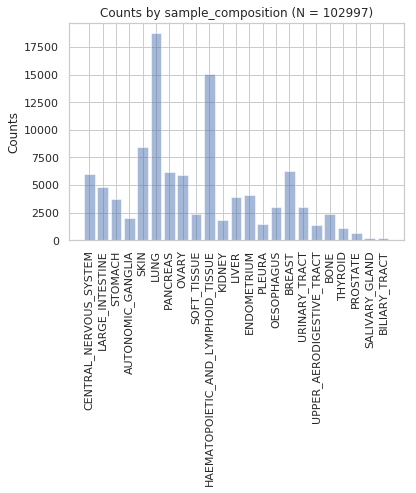

In [26]:
# Plot a bar graph of categorical variable counts in a dataframe
plot_categorical_property("sample_composition", lab_test_df)

### 4.4 Plot a bar graph of categorical variable counts in order from largest to smallest

In [27]:
# Define function
def plot_categorical_property_by_order(property,df): 
    df = df[df[property].notnull()]
    N = len(df)
    categories, counts = zip(*df[property].value_counts().items())  # valuecounts orders it from largest to smallest 
    y_pos = np.arange(len(categories))
    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Counts')
    plt.title(str('Counts by '+property+' (N = '+str(N)+')'))
    plt.xticks(rotation=90, horizontalalignment='center')
    #add N for each bar
    plt.show()

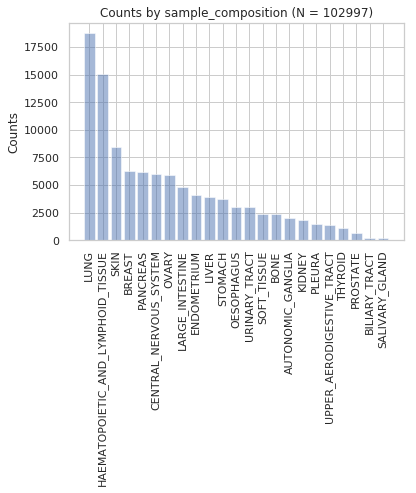

In [28]:
# Plot a bar graph of categorical variable counts in a dataframe
plot_categorical_property_by_order("sample_composition", lab_test_df)

### 4.5 Plot the probability PDF of a numeric property

In [29]:
# Define function
def plot_numeric_property(property,df,by_project=False):
    df[property] = pd.to_numeric(df[property],errors='coerce') # This line changes object into float 
    df = df[df[property].notnull()]
    data = list(df[property])
    N = len(data)
    fig = sns.distplot(data, hist=False, kde=True,
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 2})
    plt.xlabel(property)
    plt.ylabel("Probability")
    plt.title("PDF for all projects "+property+' (N = '+str(N)+')') # You can comment this line out if you don't need title
    plt.show(fig)

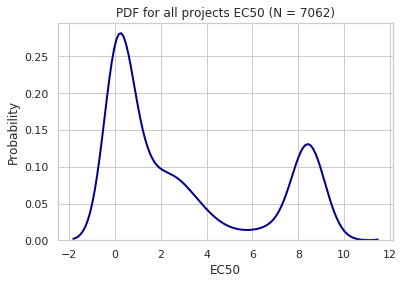

In [30]:
# Plots the probability of EC50
plot_numeric_property('EC50', lab_test_df) 

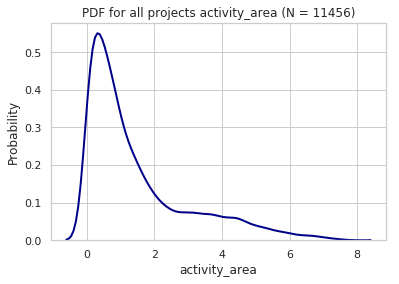

In [31]:
# Plots the probability of the activity area
plot_numeric_property('activity_area', lab_test_df) 

### 4.5 Scatter plot of numeric variables

In [32]:
def scatter_numeric_by_numeric(df, numeric_property_a, numeric_property_b):
    df[numeric_property_a] = pd.to_numeric(df[numeric_property_a],errors='coerce') #BB: this line changes object into float 
    df = df[df[numeric_property_a].notnull()]

    df[numeric_property_b] = pd.to_numeric(df[numeric_property_b],errors='coerce') #BB: this line changes object into float 
    df = df[df[numeric_property_b].notnull()]

    data = list(df[numeric_property_a])
    N = len(data)

    plt.scatter(df[numeric_property_a], df[numeric_property_b])
    plt.title(numeric_property_a + " vs " + numeric_property_b)
    plt.xlabel(numeric_property_a)
    plt.ylabel(numeric_property_b)

    plt.show()

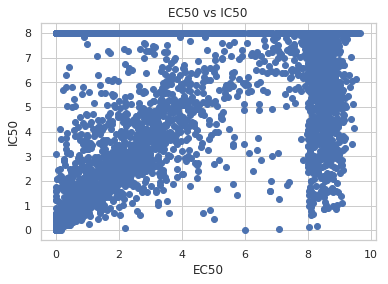

In [33]:
# Plots a scatter plot of two numeric variables, here EC50 vs IC50
scatter_numeric_by_numeric(lab_test_df, 'EC50', 'IC50')

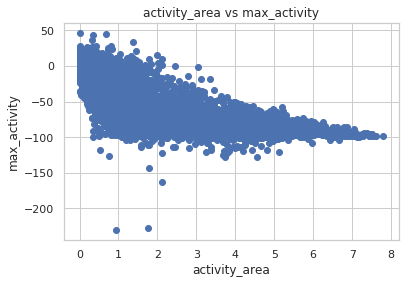

In [34]:
# Plots a scatter plot of two numeric variables, here activity area vs maximum activity 
scatter_numeric_by_numeric(lab_test_df, 'activity_area', 'max_activity')

### 4.6 Display the counts of each category in a categorical variable

In [35]:
# Define function
def property_counts_by_project(prop, df):
    df = df[df[prop].notnull()]
    categories = list(set(df[prop]))
    projects = list(set(df['project_id']))

    project_table = pd.DataFrame(columns=['Project','Total']+categories)
    project_table

    proj_counts = {}
    for project in projects:
        cat_counts = {}
        cat_counts['Project'] = project
        df1 = df.loc[df['project_id']==project]
        total = 0
        for category in categories:
            cat_count = len(df1.loc[df1[prop]==category])
            total+=cat_count
            cat_counts[category] = cat_count

        cat_counts['Total'] = total
        index = len(project_table)
        for key in list(cat_counts.keys()):
            project_table.loc[index,key] = cat_counts[key]

        project_table = project_table.sort_values(by='Total', ascending=False, na_position='first')


    return project_table

In [36]:
property_counts_by_project("sample_composition", lab_test_df)

,Project,Total,KIDNEY,BILIARY_TRACT,URINARY_TRACT,ENDOMETRIUM,PLEURA,OESOPHAGUS,LUNG,CENTRAL_NERVOUS_SYSTEM,...,BREAST,PANCREAS,SALIVARY_GLAND,THYROID,SOFT_TISSUE,STOMACH,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UPPER_AERODIGESTIVE_TRACT,LARGE_INTESTINE,PROSTATE
0,OpenAccess-CCLE,102997,1876,216,3002,4118,1485,3021,18746,6018,...,6300,6218,207,1080,2402,3778,15093,1404,4811,648


### 4.7 Display the counts of each category in a categorical variable in table form and sorted

In [37]:
# Define function
def property_counts_table(prop, df):
    df = df[df[prop].notnull()]
    counts = Counter(df[prop])
    df1 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
    df1 = df1.rename(columns={'index':prop, 0:'count'}).sort_values(by='count', ascending=False)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    
    display(df1)
    display(df1.columns)
    

In [38]:
property_counts_table("sample_composition", lab_test_df)

,sample_composition,count
5,LUNG,18746
9,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,15093
4,SKIN,8419
15,BREAST,6300
6,PANCREAS,6218
0,CENTRAL_NERVOUS_SYSTEM,6018
7,OVARY,5917
1,LARGE_INTESTINE,4811
12,ENDOMETRIUM,4118
11,LIVER,3906


Index(['sample_composition', 'count'], dtype='object')

### 4.8 Display the counts of each category in a pie chart and save image

In [39]:
# First, sort the amount of counts for a tissue, rename columns and show
sc_counts = lab_test_df.sample_composition.value_counts()
sc_counts = sc_counts.reset_index()
sc_counts = sc_counts.rename(columns={'index': 'sample_composition', 'sample_composition':'counts'})
sc_counts

,sample_composition,counts
0,LUNG,18746
1,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,15093
2,SKIN,8419
3,BREAST,6300
4,PANCREAS,6218
5,CENTRAL_NERVOUS_SYSTEM,6018
6,OVARY,5917
7,LARGE_INTESTINE,4811
8,ENDOMETRIUM,4118
9,LIVER,3906


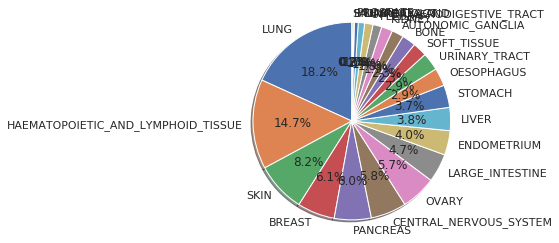

In [40]:
# Second, return a pie chart of the counts for each category
data = sc_counts["counts"]
categories = sc_counts["sample_composition"]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- This pie chart shows too many entries. We will need to edit the amount of categories and we want to make changes to the color.

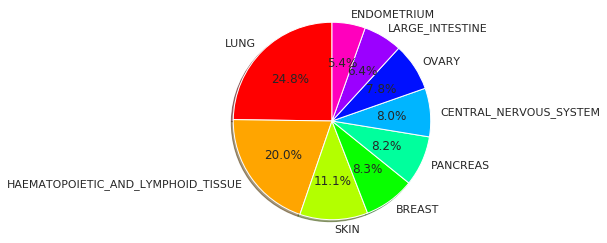

In [41]:
# Make a pie chart that shows only the categories with counts > 4000
top10 = sc_counts[sc_counts.counts > 4000].nlargest(10, 'counts') 
data = top10['counts']
categories = top10["sample_composition"]


fig1, ax1 = plt.subplots()

# Changing the color of the pie
theme = plt.get_cmap('hsv')
ax1.set_prop_cycle("color", [theme(1. * i / len(top10))
                             for i in range(len(top10))])

ax1.pie(data, labels=categories, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



In [42]:
# Save the pie chart above
fig1.savefig('plot.png')

End of demo notebook. Please terminate your workspace session when finished.

See also [other notebooks available here](https://gen3.org/resources/user/analyze-data/#5-jupyter-notebook-demos).